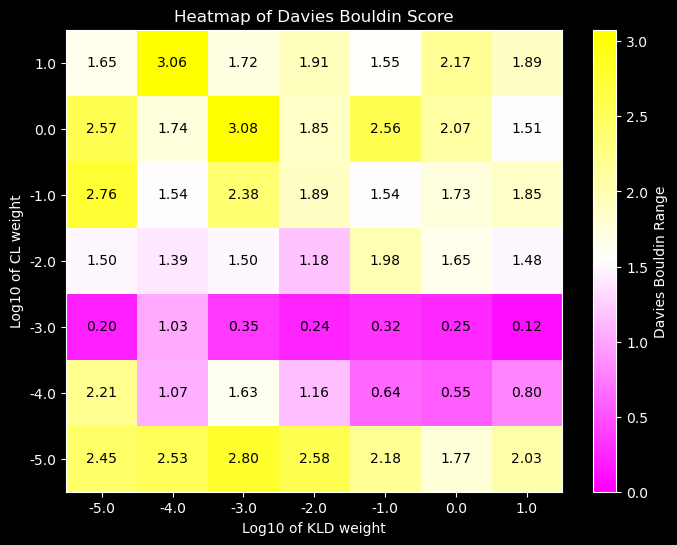

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [
    (1.0, 0.0, 1.0),   # Purple
    (1.0, 1.0, 1.0),  # White
    (1.0, 1.0, 0.0)  # Yellow
] 
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_colormap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Generate sample data for demonstration purposes
# Assuming you have two hyperparameters: param1 and param2

# Example grid ranges (logarithmically spaced)
param1 = np.logspace(-5, 1, num=7)  # 7 values from 1e-5 to 10
param2 = np.logspace(-5, 1, num=7)  # 7 values from 1e-5 to 10

# Create a grid of scores (for demonstration, we use random values between -1 and 1)
scores = [[2.4499,2.5309,2.7968,2.5790,2.1810,1.7673,2.0314],#cl_weight = 1e-5
          [2.2088,1.0714,1.6276,1.1627,0.6356,0.5541,0.8017],#cl_weight = 1e-4
          [0.2004,1.0346,0.3530,0.2431,0.3183,0.2534,0.1216],#cl_weight = 1e-3
          [1.5003,1.3863,1.4972,1.1821,1.9775,1.6457,1.4780],#cl_weight = 1e-2
          [2.7615,1.5370,2.3757,1.8916,1.5364,1.7279,1.8478],#cl_weight = 1e-1
          [2.5742,1.7381,3.0770,1.8529,2.5585,2.0672,1.5126],#cl_weight = 1
          [1.6541,3.0630,1.7213,1.9105,1.5487,2.1739,1.8948]]#cl_weight = 10
        # kld_weight = 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10

# Convert hyperparameter values to their log10 values for plotting
log_param1 = np.log10(param1)
log_param2 = np.log10(param2)

plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['savefig.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

# Create a heatmap plot
plt.figure(figsize=(8, 6))
plt.imshow(scores, aspect='auto', cmap=custom_cmap, origin='lower',
           extent=[log_param1.min() - (log_param1[1] - log_param1[0])/2, log_param1.max() + (log_param1[1] - log_param1[0])/2,
                   log_param2.min() - (log_param2[1] - log_param2[0])/2, log_param2.max() + (log_param2[1] - log_param2[0])/2],
                   vmin=0)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Davies Bouldin Range')

# Label the axes with the log values
plt.xticks(ticks=log_param1, labels=np.round(log_param1, 2))
plt.yticks(ticks=log_param2, labels=np.round(log_param2, 2))

plt.xlabel('Log10 of KLD weight')
plt.ylabel('Log10 of CL weight')
plt.title('Heatmap of Davies Bouldin Score')

for i in range(len(log_param1)):
    for j in range(len(log_param2)):
        plt.text(log_param1[i], log_param2[j], f'{scores[j][i]:.2f}', 
                 ha='center', va='center', color='black')

plt.show()
